In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf
!unzip pubfig83 

Archive:  pubfig83.zip
   creating: pubfig83/
   creating: pubfig83/Adam Sandler/
  inflating: pubfig83/Adam Sandler/103.jpg  
  inflating: pubfig83/Adam Sandler/108.jpg  
  inflating: pubfig83/Adam Sandler/11.jpg  
  inflating: pubfig83/Adam Sandler/111.jpg  
  inflating: pubfig83/Adam Sandler/114.jpg  
  inflating: pubfig83/Adam Sandler/116.jpg  
  inflating: pubfig83/Adam Sandler/119.jpg  
  inflating: pubfig83/Adam Sandler/127.jpg  
  inflating: pubfig83/Adam Sandler/132.jpg  
  inflating: pubfig83/Adam Sandler/134.jpg  
  inflating: pubfig83/Adam Sandler/136.jpg  
  inflating: pubfig83/Adam Sandler/14.jpg  
  inflating: pubfig83/Adam Sandler/149.jpg  
  inflating: pubfig83/Adam Sandler/151.jpg  
  inflating: pubfig83/Adam Sandler/152.jpg  
  inflating: pubfig83/Adam Sandler/157.jpg  
  inflating: pubfig83/Adam Sandler/161.jpg  
  inflating: pubfig83/Adam Sandler/165.jpg  
  inflating: pubfig83/Adam Sandler/166.jpg  
  inflating: pubfig83/Adam Sandler/17.jpg  
  inflating: pubfig83

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_image_flt(image_path):
    image = cv2.imread(image_path, -1)
    return image.flatten()

In [0]:
def get_subjects(dataset_path):
    return os.listdir(dataset_path)

In [0]:
def get_images(subject_path):
    return os.listdir(subject_path)

In [0]:
def read_data(dataset_path):
    data = np.zeros((13838, 100*100*3))
    labels = dict()
    index = 0
    
    subjects = get_subjects(dataset_path)
    print(subjects)
    for subject in subjects:
        print(subject)
        subject_path = dataset_path + "//" + subject
        image_list = get_images(subject_path)
        
        for image in image_list:
            image_path = subject_path + "//" + image
            data[index, :] = get_image_flt(image_path)
            labels[index] = subject
            index += 1
    
    return data, labels

In [0]:
def array_to_image(image):
    return np.reshape(image, (100,100,3))

In [14]:
dataset_path = "pubfig83/"
data, labels = read_data(dataset_path)

['Cate Blanchett', 'Angelina Jolie', 'Ehud Olmert', 'Leonardo DiCaprio', 'Charlize Theron', 'Keira Knightley', 'Colin Farrell', 'Cristiano Ronaldo', 'Silvio Berlusconi', 'Michael Bloomberg', 'Viggo Mortensen', 'Jennifer Lopez', 'Claudia Schiffer', 'Hugh Laurie', 'Kate Winslet', 'Victoria Beckham', 'Nicole Richie', 'Ben Affleck', 'Reese Witherspoon', 'Stephen Colbert', 'Morgan Freeman', 'Scarlett Johansson', 'Beyonce Knowles', 'Sharon Stone', 'Renee Zellweger', 'Nicole Kidman', 'Uma Thurman', 'Daniel Radcliffe', 'Orlando Bloom', 'Joaquin Phoenix', 'Meryl Streep', 'Sania Mirza', 'Jennifer Aniston', 'Halle Berry', 'George Clooney', 'Lindsay Lohan', 'Ricky Martin', 'Steve Carell', 'Clive Owen', 'Jack Nicholson', 'Jennifer Love Hewitt', 'Gwyneth Paltrow', 'Harrison Ford', 'Faith Hill', 'Ashton Kutcher', 'Will Smith', 'Eva Mendes', 'Adam Sandler', 'Mickey Rourke', 'Shahrukh Khan', 'David Beckham', 'Brad Pitt', 'Julia Roberts', 'Meg Ryan', 'Miley Cyrus', 'Kate Moss', 'Avril Lavigne', 'Julia S

**Check sample image**

In [0]:
i = array_to_image(data[0,:])

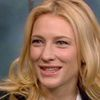

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(i)

In [17]:
len(labels)

13838

**Save data and labels as CSV files**


In [0]:
np.savetxt("pubfig83.csv", data, delimiter = ",")
np.savetxt("labels.csv", data, delimiter = ",")

**Download saved CSV files**

In [20]:
from google.colab import files
files.download('pubfig83.csv')
files.download('labels.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 49984, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil